## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **5th December 2022 at 11:59 pm**. No extention is available on this assignment due to tight grading deadlines. That's why this is an optional assignment.

6. You are **not allowed to use a `for` loop in this assignment**.

7. There is a **bonus** question worth 10 points.

8. There are hints provided in a couple of questions. For each of those questions, if you can propose a solution that is shorter than the one proposed in the hint, you will get 20 **ultra-bonus** points. Email your solution to *krish@northwestern.edu* to claim the ultra-bonus points. A solution may be shorter in terms of number of computations. If it is shorter with respect to any other criterion, then the number of ultra-bonus points awarded will be a subjective decision.

9.  The maximum possible score in the assigment is 100 + 10 (bonus question) + 40 (two ultra-bonus questions) = 150 out of 100. There is no partial credit for bonus / ultra-bonus questions.

10. If you are updating a dataset (imputing missing values / creating new variables), then use the updated dataset in a subsequent question.

## Spotify

Read the spotify dataset from the file *spotify_data.csv*. 

What percentage of all the unique tracks are contributed by the top 3 artists of each genre, where the top artists are based on `artist_popularity`, and the unique tracks are based on unique values of `track_name`? If there are multiple values of `artist_popularity` for an `artist_name`-`genres` combination, then consider the maximum value of `artist_popularity`.

The following approach will **not** work: If you group the data by `genres`, and filter the top 3 rows by `artist_popularity`, then you may not get 3 unique artists, as one artist can have multiple tracks.

*(12 points)*

**Hint:**

1. Group the data by `genres`, and `artist_name`. Find the number of unique tracks (by `track_name`) and maximum `artist_popularity` for each group. 

2. The dataset obtained in (1) is at artist-genre level, i.e., each row corresponds to a unique `artist_name`-`genres` combination. Group that dataset by `genres`, and filter the top 3 rows of each group based on `artist_popularity`. 

3. Sum up the number of unique tracks of the dataset obtained in (2) and divide it by the total number of unique tracks in the original dataset.


**Note:** The functions `nunique()`, and `agg()` may be useful. 

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
spotify_data = pd.read_csv('./Datasets/spotify_data.csv')
grouped = spotify_data.groupby(['genres','artist_name'])
artist_genre_lvl=grouped.agg({'track_name':'nunique','artist_popularity':'max'}).reset_index()
artist_genre_lvl.head()

genres    artist_name  track_name  artist_popularity
0  country   Alan Jackson          61                 76
1  country  Blake Shelton          16                 77
2  country   Brad Paisley          16                 71
3  country    Brett Young           5                 73
4  country  Casey Donahew           3                 60

In [140]:
top3_artists_data = artist_genre_lvl.groupby('genres').apply(lambda x:x.sort_values(by = 'artist_popularity',ascending = False)[0:3])
top3_artists_data.track_name.sum()/(spotify_data.track_name.nunique())

0.047680082030248656

The top 3 artisits of each genre contribute to 5% of the total number of tracks.

## Canadian Fish Biodiversity

Read data from the file "Canadian_Fish_Biodiversity.csv" on Canvas. Each row records a unique fishing event from a 2013 sample of fish populations in Ontario, Canada. To analyze the results of these fishing surveys, we need to understand the dynamics of projects, sites, and geographic locations.

In [71]:
cfbdata = pd.read_csv("./Datasets/Canadian_Fish_Biodiversity.csv")

### Top 3 projects
Each site (identified by the column `SITEID`) represents a time and place at which fishing events occurred. Sites are grouped into broader projects (identified by the column `Project Name`). We want to understand the scope of these projects.

Using `groupby()`, find the top three projects by number of unique sites.

*(4 points)*

In [72]:
cfbdata.groupby("Project Name")["SITEID"].nunique().sort_values(ascending=False).head(3)

Project Name
2013 GLAP Survey of Detroit River           220
2013 Crown Marsh Survey                     146
2013 Spotted Gar Critical Habitat Survey    131
Name: SITEID, dtype: int64

### Missing value imputation with `groupby()`

#### Number of missing values
How many values are missing for the air temperature column (`Air Temperature (C)`)? 

*(1 point)*

In [141]:
cfbdata['Air Temperature (C)'].isnull().sum()

808

808 values are missing for the air temperature column.

#### Missing value imputation: attempt 1
Using `groupby()`, impute the missing values of air temperature with the median air temperature of the corresponding water body (`Waterbody Name`) and `Month`. 

*(4 points)*

In [142]:
cfbdata["Air Temperature (C)"] = cfbdata.groupby(["Waterbody Name",'Month'])["Air Temperature (C)"].apply(lambda x:x.fillna(x.median()))

#### Missing values remaining after attempt 1
How many missing values still remain for the air temperature column after the imputation in the previous question? 

*(1 point)*

In [143]:
cfbdata["Air Temperature (C)"].isnull().sum()

113

113 missing values still remain after the imputation in the previous question.

#### Missing value imputation: attempt 2
We will try to impute the remaining missing values for air temperature. Try impute the remaining missing values of air temperature with the median air temperature of the corresponding project (`Project Name`) and `Month`. 

*(4 points)*

In [144]:
cfbdata["Air Temperature (C)"] = cfbdata.groupby(["Project Name",'Month'])["Air Temperature (C)"].apply(lambda x:x.fillna(x.median()))

#### Missing values remaining after attempt 2
How many missing values still remain for the air temperature column after the imputation in the previous question? 

*(1 point)*

In [145]:
cfbdata["Air Temperature (C)"].isnull().sum()

62

62 missing values still remain after the imputation in the previous question.

#### Air-water temperatures correlation
Find the correlation between air temperature and water temperature. 

*(1 point)*

In [45]:
cfbdata["Air Temperature (C)"].corr(cfbdata["Water Temperature (C)"])

0.7681845726335175

Correlation = 77%

#### Missing values remaning after hypothetical attempt 3
As you found a high correlation between air temperature and water temperature, you can use water temperature to estimate the air temperature (using the trendline, like you did in assignment 5). Assuming you already did that, how many missing values will still remain for the air temperature column? 

**Note:** Do not impute the missing values using the trendline, just assume you already did that.

*(3 points)*

The values for air temperature will remain missing for those observations that have missing values of water temperature.

In [46]:
(cfbdata['Air Temperature (C)'].isnull() & cfbdata['Water Temperature (C)'].isnull()).sum()

11

11 missing values will still remain after imputing the missing values using the trendline.

#### Visualizing missing value imputation
Make a scatterplot of air temperature against water temperature. Higlight the points for which the air temperature was imputed in attempts 1 and 2 with a different color. 

*(8 points)*

In [148]:
cfbdata_orig = pd.read_csv("./Datasets/Canadian_Fish_Biodiversity.csv")

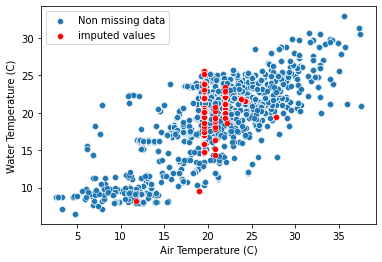

In [149]:
ind_imputed = np.where(cfbdata_orig['Air Temperature (C)'].isnull() & ~cfbdata['Air Temperature (C)'].isnull())[0]
sns.scatterplot(data = cfbdata_orig, x = 'Air Temperature (C)', y = 'Water Temperature (C)')
sns.scatterplot(data = cfbdata.iloc[ind_imputed,:], x = 'Air Temperature (C)', y = 'Water Temperature (C)',color = 'red')
plt.legend(labels = ['Non missing data','imputed values'])

### Living conditions
This section begins to investigate the living conditions of fish at different locations and time periods. Continue using the updated dataset with the imputed missing values in attempts 1 and 2 of the previous section.

#### Air-water temperatures: Summary statistics
Use a single `groupby` statement to view the minimum, mean, standard deviation, and maximum air temperature and water temperature for each project during the month of August (use the `Month` column). 

*(5 points)*

In [75]:
cfb_month = cfbdata[cfbdata["Month"]==8]
cfb_month.groupby("Project Name")[["Air Temperature (C)","Water Temperature (C)"]].agg(['min','mean','std','max'])

Air Temperature (C)             \
                                                             min       mean   
Project Name                                                                  
2013 Bridle Shiner Critical Habitat Survey                  20.7  24.609091   
2013 Crown Marsh Survey                                     16.4  21.667872   
2013 GLAP Survey of Detroit River                           21.1  24.406220   
2013 Grass Pickerel Niagara Drains                          20.8  25.246154   
2013 Grass Pickerel Twenty Mile Creek                       22.5  25.340107   
2013 Lake Chubsucker Critical Habitat Survey                14.3  20.814612   
2013 Mussel Fish Community Assessment                       23.0  24.535887   
2013 Pugnose Minnow Lake St Clair Drains                    22.2  25.303061   
2013 Species at Risk Assessment                             23.3  24.456000   
2013 Spotted Gar Critical Habitat Survey                    18.6  22.706481   

                                                              \
                                                   std   max   
Project Name                                                   
2013 Bridle Shiner Critical Habitat Survey    2.588098  26.5   
2013 Crown Marsh Survey                       2.057387  26.2   
2013 GLAP Survey of Detroit River             2.652812  28.3   
2013 Grass Pickerel Niagara Drains            2.498615  28.2   
2013 Grass Pickerel Twenty Mile Creek         2.395997  29.4   
2013 Lake Chubsucker Critical Habitat Survey  3.968119  32.6   
2013 Mussel Fish Community Assessment         1.203286  26.1   
2013 Pugnose Minnow Lake St Clair Drains      1.961982  29.0   
2013 Species at Risk Assessment               0.809362  25.0   
2013 Spotted Gar Critical Habitat Survey      2.590503  27.7   

                                             Water Temperature (C)             \
                                                               min       mean   
Project Name                                                                    
2013 Bridle Shiner Critical Habitat Survey                  20.630  22.052182   
2013 Crown Marsh Survey                                     17.430  22.007084   
2013 GLAP Survey of Detroit River                           21.646  22.028226   
2013 Grass Pickerel Niagara Drains                          17.150  20.105641   
2013 Grass Pickerel Twenty Mile Creek                       18.990  22.380238   
2013 Lake Chubsucker Critical Habitat Survey                19.300  21.671746   
2013 Mussel Fish Community Assessment                       21.800  23.155645   
2013 Pugnose Minnow Lake St Clair Drains                    18.970  20.713163   
2013 Species at Risk Assessment                             21.960  22.075600   
2013 Spotted Gar Critical Habitat Survey                    18.639  21.349769   

                                                               
                                                   std    max  
Project Name                                                   
2013 Bridle Shiner Critical Habitat Survey    0.503887  22.44  
2013 Crown Marsh Survey                       1.240151  23.24  
2013 GLAP Survey of Detroit River             0.392402  23.11  
2013 Grass Pickerel Niagara Drains            2.426792  23.96  
2013 Grass Pickerel Twenty Mile Creek         2.533686  26.87  
2013 Lake Chubsucker Critical Habitat Survey  1.619878  25.13  
2013 Mussel Fish Community Assessment         1.156345  24.60  
2013 Pugnose Minnow Lake St Clair Drains      1.676571  24.22  
2013 Species at Risk Assessment               0.080936  22.13  
2013 Spotted Gar Critical Habitat Survey      1.978877  24.30

#### Air-water temperatures: visualizing yearly trend
Make lineplots showing maximum air temperature and water temperature by `Month` and `Region`. To construct `Region`, use the Pandas function `cut()` to satisfy the following conditions:

- Rows with a latitude lower than 42.4 should have *Southern* in the `Region` column 
- Rows with a latitude between 42.4 and 42.8 should have *Central* in the `Region` column 
- Rows with a latitude higher than 42.8 should have *Northern* in the `Region` column 

You can have the month on the horizontal axis, the temperature on the vertical axis, different colors for different regions, and different styles (solid line / dotted line) to indicate air/water temperature.

Does anything in the visualization surprise you? Why or why not? 

*(14 points)*

In [76]:
lat_bins = [40,42.4,42.8,46]
lat_names = ["Southern","Central","Northern"]

cfbdata["Region"] = pd.cut(cfbdata["Start Latitude"],lat_bins,labels=lat_names)

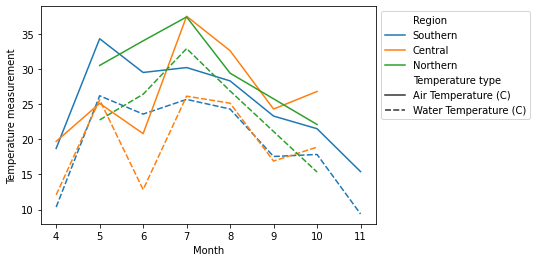

In [77]:
datag = cfbdata.groupby(['Region','Month'],as_index = False)[['Air Temperature (C)','Water Temperature (C)']].max()
data_melt = pd.melt(datag, id_vars = ['Region','Month'],var_name = 'Temperature type',value_name = 'Temperature measurement')
sns.lineplot(data = data_melt, x = 'Month',y = 'Temperature measurement', hue = 'Region',style = 'Temperature type')
plt.legend(bbox_to_anchor = (1,1))

*(Sample answer -- any reasonable interpretation is acceptable)*

I'm surprised that both water and air maximum temperatures in the Northern region are higher than other regions' in June and July—I would've expected bodies of water further north to be generally colder. I'm also surprised that maximum temperatures in the Central region increase from September to October.

### Fish diversity

Finally let's focus on the stars of this survey—the fish, of course.

#### Top 3 species by `Region`
Let's continue using our `Region` categorization. Find the top three fish `Species` in each region by `Number Captured`. 

*(12 points)*

In [90]:
cfbdata.groupby(['Species','Region'])['Number Captured'].sum().reset_index().\
groupby('Region').apply(lambda x:x.sort_values(by = 'Number Captured',ascending = False).head(3))

Species    Region  Number Captured
Region                                                         
Southern 189     Lepomis macrochirus  Southern           5072.0
         78      Dorosoma cepedianum  Southern           3559.0
         246  Neogobius melanostomus  Southern           2265.0
Central  190     Lepomis macrochirus   Central           2126.0
         163    Labidesthes sicculus   Central           2029.0
         274      Notropis heterodon   Central           1562.0
Northern 248  Neogobius melanostomus  Northern           2522.0
         296     Notropis volucellus  Northern           2104.0
         191     Lepomis macrochirus  Northern           1841.0

#### Species spread across `Region`
Are certain fish only found in some regions? Visualize how many species are in all three regions, how many are in two of three, and how many were only captured in one region. 

*(10 points)*

In [104]:
region_num=cfbdata.groupby('Species',as_index=False)['Region'].nunique().groupby('Region',as_index=False).nunique()
region_num

Region  Species
0       1       51
1       2       30
2       3       51

Text(0, 0.5, 'Number of species')

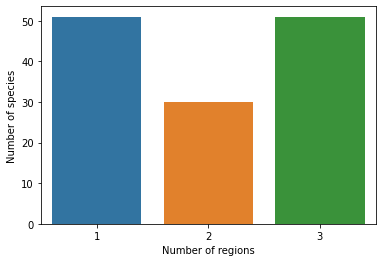

In [107]:
sns.barplot(x='Region',y="Species",data=region_num)
plt.xlabel('Number of regions')
plt.ylabel('Number of species')

#### Exclusive fishes by region
What percentage of all species are exclusively captured in the Southern region? How about the Northern Region? And the Central region? 

*(12 points)*

**Hint:**

1. Find the number of distinct regions in which each species is found.
2. Filter the species that are found in only one region.
3. Group the data, containing only the species found in (2), by region, count the number of unique species in each group, and divide by the total number of distinct species.

In [124]:
regions_by_species=cfbdata.groupby(['Species'],as_index=False)['Region'].nunique()
one_region_species=regions_by_species.loc[regions_by_species.Region==1,'Species']
cfbdata.loc[cfbdata.Species.isin(one_region_species),:].groupby('Region')['Species'].nunique()/cfbdata["Species"].nunique()

Region
Southern    0.090909
Central     0.045455
Northern    0.250000
Name: Species, dtype: float64

#### Turbidity
Turbidity (`Turbidity (ntu)`) quantifies the level of cloudiness in liquid. For fish in each of the three regions, is there a linear association between turbidity and number of fish caught? You may consider a correlation higher than 50% in magnitude as presence of a linear association.

*(4 points)*

In [68]:
cfbdata.groupby('Region').apply(lambda x:x['Turbidity (ntu)'].corr(x['Number Captured']))

Region
Southern   -0.019202
Central    -0.016327
Northern    0.063456
dtype: float64

No, there does not appear to be a linear association.

#### Fish dimensions
Now let's turn to the length of fish captured, given by *Maximum (mm)* and *Minimum (mm)*. Find the overall maximum and minimum lengths of all fish in each region. Which region has the largest range in captured fish length? 

*(4 points)*

In [72]:
cfbdata.groupby("Region").agg({"Maximum (mm)": 'max', "Minimum (mm)" : 'min'})

Maximum (mm)  Minimum (mm)
Region                              
Southern        1130.0           8.0
Central          785.0           9.0
Northern         760.0          10.0

The Southern region has the largest range in captured fish length.

#### **Bonus question:** Inverse Simpson index

Find the inverse Simpson index of species counts for each waterbody type (`WaterbodyType`) within each region. Which combination of waterbody type and region has the greatest diversity of fish species? Which has the least?

The inverse Simpson index $(\frac{1}{\lambda})$ is a measure of ecological diversity, for which a larger index number indicates a greater diversity of species. The index is calculated as:

$\frac{1}{\lambda} = 1/(\sum^R_{i=1} p_i^2)$

where $R$ is the number of unique species and $p_i$ is the proportion of fish belonging to species $i$. 

*(10 points - no partial credit)*

In [137]:
wrs_captured = cfbdata.groupby(["WaterbodyType","Region","Species"],as_index=False)["Number Captured"].sum()
wrs_captured = wrs_captured[wrs_captured["Number Captured"]>0]
wrs_captured.groupby(["WaterbodyType","Region"])["Number Captured"].apply(lambda x:((x/x.sum())**2).sum()**-1)

WaterbodyType  Region  
Lake           Southern     4.094649
               Central      3.854458
               Northern     4.896119
Stream         Southern    13.800772
               Central     12.070477
               Northern    20.306997
Wetland        Southern          NaN
               Central      8.954213
               Northern          NaN
Name: Number Captured, dtype: float64

According to the inverse Simpson index, Northern streams have the greatest diversity in fish species and Central lakes have the least. The survey didn't include any fish in Southern or Northern wetlands, so we can't describe these bodies of water in terms of fish diversity. 